### Ford Go Bike Data Visualization and Analysis


### by Sai Ogirala

### Table Contents:

1) Introduction of the topic and about dataset

2) Preliminary wrangling

3) Data Assessment

4) Cleaning

5) Univariate Exploration and Analysis

6) Bivariate Exploration and Analysis

7) Multivariate Exploration and Analysis

8) Conclusions

### Introduction: 
 Ford GoBike is the Bay Area's new bike share system, with thousands of public bikes for use across San Francisco, East Bay and San Jose. Renting Bikes is designed with convenience in mind. it’s a fun and affordable way to get around town.It aslo offers Single Ride is 2 dollars per day which is great for one way trip, Monthly Memberships is 15 dollars per month for its good deal for locals and Access Pass for 10 dollars which is perfect for exploring.
 
 ### About Dataset:
 
 I chose Ford GoBike System Data : https://www.fordgobike.com/system-data as my source data
This data set includes information about individual rides made in a bike-sharing system.Multiple data files will need to be joined together if a full year’s coverage is desired.
The features included in the dataset : Trip Duration (seconds) , Start Time and Date , End Time and Date , Start Station ID , Start Station Name , Start Station Latitude , Start Station Longitude , End Station ID , End Station Name, End Station Latitude , End Station Longitude , Bike ID , User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual) , Member Year of Birth, Member Gender

### Part 1:Preliminary Data Wrangling

In [4]:
# import all packages and set plots to be embedded inline
from requests import get
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import glob
import os
import math
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [5]:
# I saved the csv files from the FordGoBike website in one location on my computer. 
#I then used the glob and os modules to store, load, and combine the files into one new file, ford_bike_data.csv:

path = r'C:\Users\vo978p\Desktop\udacity\data_visualization\Ford_Go_Bike_201801_201812'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('ford_bike_data.csv', index = False)

In [6]:
# Load dataset 
df= pd.read_csv('ford_bike_data.csv')

In [7]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120.0,Mission Dolores Park,37.761420,-122.426435,285.0,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304.0,Jackson St at 5th St,37.348759,-121.894798,296.0,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75.0,Market St at Franklin St,37.773793,-122.421239,47.0,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74.0,Laguna St at Hayes St,37.776435,-122.426244,19.0,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


### Part2:Data Assessment 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [9]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1583220,1261,2018-10-03 07:17:18.4610,2018-10-03 07:38:20.2510,145.0,29th St at Church St,37.743684,-122.426806,26.0,1st St at Folsom St,37.787290,-122.394380,4218,Subscriber,1981.0,Male,No
972199,597,2018-07-09 14:13:27.5820,2018-07-09 14:23:24.9870,124.0,19th St at Florida St,37.760447,-122.410807,77.0,11th St at Natoma St,37.773507,-122.416040,3110,Subscriber,1990.0,Female,No
1319868,432,2018-09-13 17:52:55.3100,2018-09-13 18:00:07.8660,210.0,45th St at Manila,37.833294,-122.256224,176.0,MacArthur BART Station,37.828410,-122.266315,2214,Subscriber,1977.0,Male,No
1155564,1757,2018-08-09 16:26:06.8380,2018-08-09 16:55:24.1110,304.0,Jackson St at 5th St,37.348759,-121.894798,304.0,Jackson St at 5th St,37.348759,-121.894798,1515,Customer,NaN,NaN,No
1328567,387,2018-09-12 17:14:45.7170,2018-09-12 17:21:12.7450,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,245.0,Downtown Berkeley BART,37.870348,-122.267764,3278,Subscriber,1962.0,Female,No
456768,665,2018-05-30 08:18:56.4530,2018-05-30 08:30:02.1500,47.0,4th St at Harrison St,37.780955,-122.399749,24.0,Spear St at Folsom St,37.789677,-122.390428,1779,Subscriber,1987.0,Other,No
532884,368,2018-05-16 11:57:50.6000,2018-05-16 12:03:59.4730,42.0,San Francisco City Hall (Polk St at Grove St),37.778650,-122.418230,74.0,Laguna St at Hayes St,37.776435,-122.426244,1255,Subscriber,1977.0,Male,No
453617,2813,2018-05-30 16:18:19.8470,2018-05-30 17:05:13.3590,58.0,Market St at 10th St,37.776619,-122.417385,77.0,11th St at Natoma St,37.773507,-122.416040,223,Subscriber,1994.0,Male,Yes
411553,384,2018-04-09 17:13:52.2090,2018-04-09 17:20:17.1590,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,342.0,Colin P Kelly Jr St at Townsend St (Temporary ...,37.781383,-122.389841,1180,Subscriber,1982.0,Male,No
1455320,337,2018-10-23 06:27:14.2760,2018-10-23 06:32:51.5260,273.0,Fulton St at Ashby Ave,37.855574,-122.263565,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,1818,Customer,1998.0,Male,No


In [10]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null object
end_time                   1863721 non-null object
start_station_id           1851950 non-null float64
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1851950 non-null float64
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null int64
user_type                  1863721 non-null object
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null object
bike_share_for_all_trip    1863721 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 227.5+ MB


In [11]:
# Check if duplicates exist
df.duplicated().sum()

0

In [12]:
# View descriptive statistics of the dataframe
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.851950e+06,1.863721e+06,1.863721e+06,1.863721e+06,1.753003e+06
mean,8.573026e+02,1.196744e+02,3.776678e+01,-1.223492e+02,1.181730e+02,3.776690e+01,-1.223487e+02,2.296851e+03,1.983088e+03
std,2.370379e+03,1.003976e+02,1.057689e-01,1.654634e-01,1.004403e+02,1.056483e-01,1.650597e-01,1.287733e+03,1.044289e+01
min,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,3.000000e+00,3.726331e+01,-1.224737e+02,1.100000e+01,1.881000e+03
25%,3.500000e+02,3.300000e+01,3.777106e+01,-1.224114e+02,3.000000e+01,3.777106e+01,-1.224094e+02,1.225000e+03,1.978000e+03
50%,5.560000e+02,8.900000e+01,3.778107e+01,-1.223974e+02,8.800000e+01,3.778127e+01,-1.223971e+02,2.338000e+03,1.985000e+03
75%,8.720000e+02,1.860000e+02,3.779625e+01,-1.222865e+02,1.830000e+02,3.779728e+01,-1.222894e+02,3.333000e+03,1.991000e+03
max,8.636600e+04,3.810000e+02,4.551000e+01,-7.357000e+01,3.810000e+02,4.551000e+01,-7.357000e+01,6.234000e+03,2.000000e+03


### Quality issues

1) start time and end time are objects change to timestamps

2) user type, gender and bike_share_for_all_trip change to category

3) bike id, start_station_id, end_station_id can be set as object

4) member birth year has dates prior to 1900

5) calculate the age of the user

6) get month, day, hour, weekday columns to further analyze the dataset

7) calculate the distance for rides 

### Part 3: Cleaning Data:

In [13]:
#create copy of original dataframe
df_clean = df.copy()

### Define: 
Change Datatypes accordingly as mentioned in Quality Issues section

### Code: 

In [14]:
# set start_time and end_time to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [15]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [16]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

### Test:

In [17]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 16 columns):
duration_sec               1863721 non-null int64
start_time                 1863721 non-null datetime64[ns]
end_time                   1863721 non-null datetime64[ns]
start_station_id           1863721 non-null object
start_station_name         1851950 non-null object
start_station_latitude     1863721 non-null float64
start_station_longitude    1863721 non-null float64
end_station_id             1863721 non-null object
end_station_name           1851950 non-null object
end_station_latitude       1863721 non-null float64
end_station_longitude      1863721 non-null float64
bike_id                    1863721 non-null object
user_type                  1863721 non-null category
member_birth_year          1753003 non-null float64
member_gender              1753354 non-null category
bike_share_for_all_trip    1863721 non-null category
dtypes: category(3), datetime64[ns](2), float

### Define: 
Calculate age of member

In [18]:
# substract the member_birth_year from the current year=2019
df_clean['member_age'] = 2019-df_clean['member_birth_year']

### Test:

In [19]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No,33.0
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No,NaN
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No,23.0
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No,NaN
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No,28.0


### Define:
Extract and Create new columns Monthname,Month,Weekday,Day of the week and hour from start_time column

### Code:

In [20]:
# extract month name from start_time column 
df_clean['st_month_name']=df_clean['start_time'].dt.strftime('%B')

In [21]:
# extract month number from start_time column
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [22]:
# extract weekdays from start_time column
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [23]:
# extract day from start_time column
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [24]:
# extract hour from start_time column
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

In [25]:
df_clean.rename(columns={'start_time_month':'st_month',
                          'start_time_weekday':'st_weekday',
                          'start_time_day':'st_day',
                          'start_time_hour':'st_hour'}, 
                 inplace=True)

### Test:

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1863721 entries, 0 to 1863720
Data columns (total 22 columns):
duration_sec               int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  category
member_birth_year          float64
member_gender              category
bike_share_for_all_trip    category
member_age                 float64
st_month_name              object
st_month                   int32
st_weekday                 object
st_day                     int32
st_hour                    int64
dtypes: category(3), datetime64[ns](2), float64(6), int32(2), int64(2), object(7)
memory usage: 261.3+ MB


In [27]:
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,st_month_name,st_month,st_weekday,st_day,st_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,Subscriber,1986.0,Male,No,33.0,January,1,Wed,31,22
1,85422,2018-01-31 16:13:34.351,2018-02-01 15:57:17.310,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,...,Customer,NaN,NaN,No,NaN,January,1,Wed,31,16
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,Customer,1996.0,Male,No,23.0,January,1,Wed,31,14
3,61076,2018-01-31 14:53:23.562,2018-02-01 07:51:20.500,321,Market St at Franklin St,37.773793,-122.421239,321,4th St at Harrison St,37.780955,...,Customer,NaN,NaN,No,NaN,January,1,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,Subscriber,1991.0,Male,No,28.0,January,1,Wed,31,19
5,6477,2018-01-31 22:58:44.867,2018-02-01 00:46:41.908,1306,Market St at 8th St,37.803686,-122.282497,1306,West Oakland BART Station,37.805318,...,Customer,NaN,NaN,No,NaN,January,1,Wed,31,22
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,...,Subscriber,1988.0,Male,No,31.0,January,1,Wed,31,23
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980.0,Male,No,39.0,January,1,Wed,31,23
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,3675,Valencia St at 24th St,37.752428,-122.420628,3675,Cyril Magnin St at Ellis St,37.785881,...,Subscriber,1987.0,Male,Yes,32.0,January,1,Wed,31,23
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,1453,Ryland Park,37.342725,-121.895617,1453,San Salvador St at 9th St,37.333955,...,Subscriber,1994.0,Female,Yes,25.0,January,1,Wed,31,23


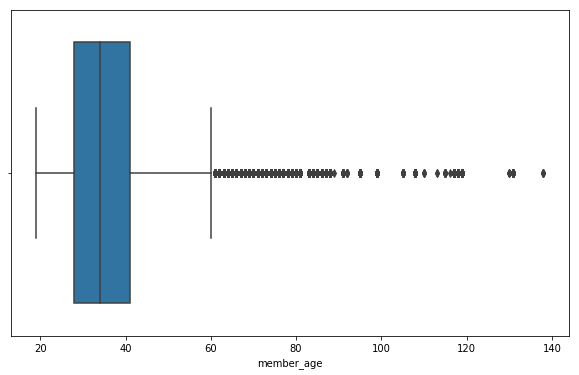

In [28]:
# code for the age boxplot

plt.figure(figsize = [10, 6])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [29]:
df_clean.member_age.mean()

35.91203780027758

In [30]:
df_clean.member_age.describe(percentiles = [ .95])

count    1.753003e+06
mean     3.591204e+01
std      1.044289e+01
min      1.900000e+01
50%      3.400000e+01
95%      5.700000e+01
max      1.380000e+02
Name: member_age, dtype: float64

### Define:
Remove Age outliers that are greater than 60. As mentioned in Quality Issues section, because in the dataset we have customers with birth year before 1900 which is over 100 years. For my analysis to keep it simple I consider members age less than 60

### Code: 

In [31]:
# Set member_age <= 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [32]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

### Test:

In [33]:
df_clean.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,st_month_name,st_month,st_weekday,st_day,st_hour
0,75284,2018-01-31 22:52:35.239,2018-02-01 19:47:19.824,2765,Mission Dolores Park,37.761420,-122.426435,2765,Webster St at O'Farrell St,37.783521,...,Subscriber,1986,Male,No,33,January,1,Wed,31,22
2,71576,2018-01-31 14:23:55.889,2018-02-01 10:16:52.116,3039,Jackson St at 5th St,37.348759,-121.894798,3039,5th St at Virginia St,37.325998,...,Customer,1996,Male,No,23,January,1,Wed,31,14
4,39966,2018-01-31 19:52:24.667,2018-02-01 06:58:31.053,617,Laguna St at Hayes St,37.776435,-122.426244,617,Post St at Kearny St,37.788975,...,Subscriber,1991,Male,No,28,January,1,Wed,31,19
6,453,2018-01-31 23:53:53.632,2018-02-01 00:01:26.805,3571,17th & Folsom Street Park (17th St at Folsom St),37.763708,-122.415204,3571,Valencia St at 24th St,37.752428,...,Subscriber,1988,Male,No,31,January,1,Wed,31,23
7,180,2018-01-31 23:52:09.903,2018-01-31 23:55:10.807,1403,Berry St at 4th St,37.775880,-122.393170,1403,4th St at Mission Bay Blvd S,37.770407,...,Subscriber,1980,Male,No,39,January,1,Wed,31,23
8,996,2018-01-31 23:34:56.004,2018-01-31 23:51:32.674,3675,Valencia St at 24th St,37.752428,-122.420628,3675,Cyril Magnin St at Ellis St,37.785881,...,Subscriber,1987,Male,Yes,32,January,1,Wed,31,23
9,825,2018-01-31 23:34:14.027,2018-01-31 23:47:59.809,1453,Ryland Park,37.342725,-121.895617,1453,San Salvador St at 9th St,37.333955,...,Subscriber,1994,Female,Yes,25,January,1,Wed,31,23
11,432,2018-01-31 23:34:26.484,2018-01-31 23:41:39.297,2928,Division St at Potrero Ave,37.769218,-122.407646,2928,San Francisco Public Library (Grove St at Hyde...,37.778768,...,Subscriber,1993,Male,No,26,January,1,Wed,31,23
13,887,2018-01-31 23:24:16.357,2018-01-31 23:39:04.123,55,San Pedro Square,37.336802,-121.894090,55,Locust St at Grant St,37.322980,...,Subscriber,1976,Female,Yes,43,January,1,Wed,31,23
14,210,2018-01-31 23:33:03.046,2018-01-31 23:36:33.704,2602,Frank H Ogawa Plaza,37.804562,-122.271738,2602,Lakeside Dr at 14th St,37.801319,...,Subscriber,1976,Male,No,43,January,1,Wed,31,23


In [34]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1708250 entries, 0 to 1863719
Data columns (total 22 columns):
duration_sec               1708250 non-null int64
start_time                 1708250 non-null datetime64[ns]
end_time                   1708250 non-null datetime64[ns]
start_station_id           1708250 non-null object
start_station_name         1696859 non-null object
start_station_latitude     1708250 non-null float64
start_station_longitude    1708250 non-null float64
end_station_id             1708250 non-null object
end_station_name           1696859 non-null object
end_station_latitude       1708250 non-null float64
end_station_longitude      1708250 non-null float64
bike_id                    1708250 non-null object
user_type                  1708250 non-null category
member_birth_year          1708250 non-null int32
member_gender              1708250 non-null category
bike_share_for_all_trip    1708250 non-null category
member_age                 1708250 non-null int

In [35]:
# save cleaned data 
df_clean.to_csv('master_bike_df.csv', index=False)

### What is the structure of your dataset?
Originally there were approx. 186,3719 bike rides that happen from Jan -Dec 2018. The dataset contained features about:

a) trip duration: start_time,end_time, how long the trip took in seconds

b) stations: start and end station id, name, geolocation (latitude/longitude)

c) customer data: gender, birth date and user type

d) rented bikes: bike id

The dataset was further added few columns to find interesting analysis:

e) Bike time: month, day, hour of the day, weekday (both for start and end date)

f) customer: age

### What is/are the main feature(s) of interest in your dataset?

I'm interested to see at what time bikes are high in demand (during the day/weekday/month). Secondly, which age customers and gender(Male/Female) uses the service mostly. Finally,the service is mostly used by members or casual riders.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
From dataset, I expect the start time will be mostly used in my analysis along with customer related data like age,gender. I expect that bike time like hour,day,weekday,month will have the strongest effect on bike demand.

### Part 4: Univariate Exploration:

I'll start by looking at the monthly trend of number of bike rentals and distribution of weekdays and hours of the day. I will also explore the duration of the trips.

### Monthly Bike Rides Usage:

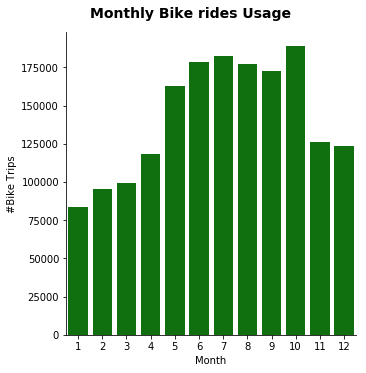

In [36]:
g = sns.catplot(data=df_clean, x='st_month', kind='count', color='green')
g.set_axis_labels("Month", "#Bike Trips")
g.fig.suptitle('Monthly Bike rides Usage', y=1.03, fontsize=14, fontweight='semibold');


Bike rides are very less during winter months due to weather conditions.But bike demand started picking up from April month  and high in demand between May and October, reaching its peak in October, followed by July month.

### Bikes rides by weekdays:

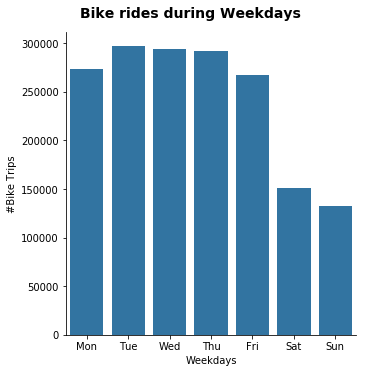

In [37]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='st_weekday', kind='count', color = base_color, order = weekday)
g.set_axis_labels("Weekdays", "#Bike Trips")
g.fig.suptitle('Bike rides during Weekdays', y=1.03, fontsize=14, fontweight='semibold');

It looks like Bike sharing is used mostly between Monday to Friday weekdays when compare to weekends.This may be due to people are accessing for daily commute to workplace and schools etc.

### Hourly Bike Ride Usage:

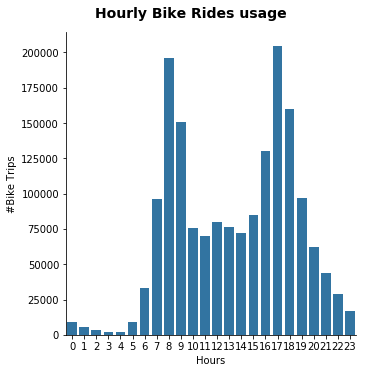

In [38]:
g = sns.catplot(data=df_clean, x='st_hour', kind='count', color = base_color)
g.set_axis_labels("Hours", "#Bike Trips")
g.fig.suptitle('Hourly Bike Rides usage', y=1.03, fontsize=14, fontweight='semibold');

From above barchart it lookslike bike sharing system used mostly between 8-9 am and 5-6 pm for the work and home commute.

###  Percentage of Bike Rides by Age Group:

In [39]:
#Generate a new column member_age_bins from member age group
df_clean['member_age_bins'] = df_clean['member_age'].apply(lambda x: '10 - 20' if 10<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else x)

In [40]:
trip_agegroup_df = df_clean.groupby('member_age_bins').agg({'bike_id':'count'})

In [41]:
trip_agegroup_df['percentage'] = (trip_agegroup_df['bike_id']/trip_agegroup_df['bike_id'].sum())*100

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

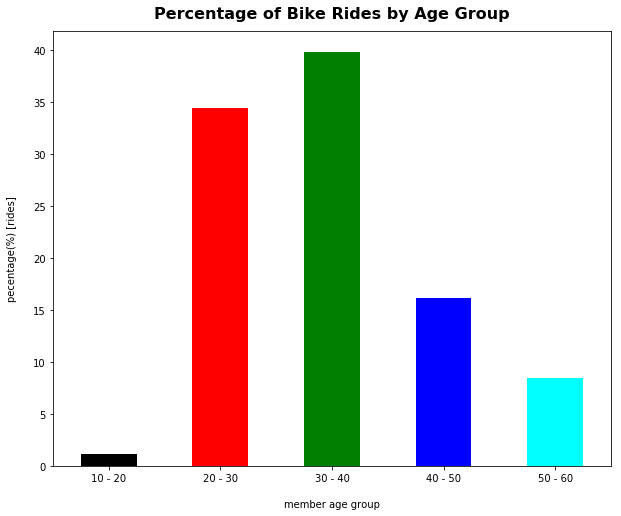

In [178]:
new_color = ['black', 'red', 'green', 'blue', 'cyan']
trip_agegroup_df['percentage'].plot(kind='bar', color=new_color, figsize=(10,8))
plt.title('Percentage of Bike Rides by Age Group', fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('member age group', labelpad=16)
plt.ylabel('pecentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)

From above bar graph it shows that, 70 % of 20-40 age group people took more bike rides,of which 40% of 30-40 age group people took more rides compare to all other age groups.

### Percentage of Bike Rides by Gender:

In [44]:
ride_gender_df = df_clean.groupby('member_gender').agg({'bike_id':'count'})

In [45]:
ride_gender_df['percentage'] = (ride_gender_df['bike_id']/ride_gender_df['bike_id'].sum())*100

(0, 100)

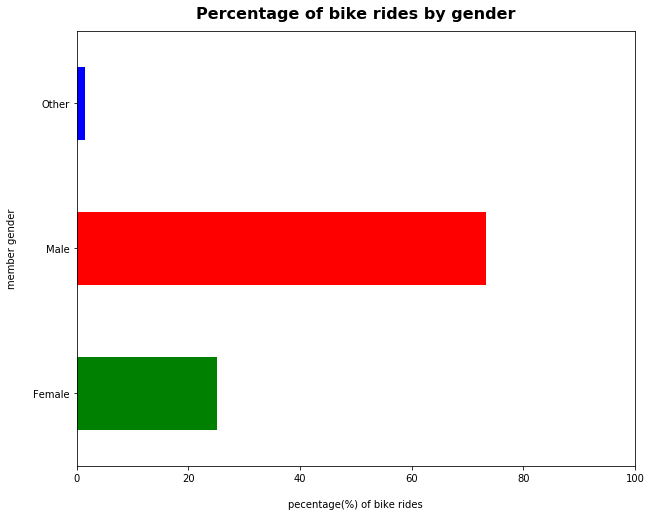

In [46]:
new_color = ['green', 'red', 'blue']
ride_gender_df['percentage'].plot(kind='barh', color=new_color, figsize=(10,8))
plt.title('Percentage of bike rides by gender', fontsize=16, y=1.015,fontweight='semibold')
plt.ylabel('member gender', labelpad=16)
plt.xlabel('pecentage(%) of bike rides', labelpad=16)
plt.xticks(rotation=360)
plt.xlim(0,100)

From bar graph it shows that 76% of male members took more rides compare to percentage of female riders and others.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I checked each variables like monthly trend of Bike riders, age groups bike riders,genders wise rides, weekdays and peak hours etc. All these variables are critical to understand the dataset and communicate the data findings.
There were originally 186,3719 bike rides happened from Jan -Dec 2018.But in order to keep it simple, I limited dataframe to age members <=60, so the dataframe reduced to 170,8250 bike rides.

Bikes are high in demand between April to October months due to summer season and they drop during winter season.
Most of the people take rides during Weekdays from Monday to Friday may be commute purposes compare to weekends. 8-9 am and 5-6pm are busy hours for daily bike riders. 

Between 30-40 years people are using more service, however 20-30 years people became leader in a year.
70% of the bike rides used by 20 to 40 years people. Among those, 40% of 30 to 40 years people took more rides.
Male took around 76% of all bike rides,where as female took around %24 of them.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was one unusal distribution in the dataset i.e member birth year has dates before 1900.95% of the members are between 17 and 57 years. To keep it dataset simple,I removed members greater than 60 years old. I also generated new columns to calculate age members, weekdays,months,hours for data analysis. I changed column data types 

### Bi-Variate Exploration:

In this section, will explore into user type data analysis

In [47]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_prop = customer / df_clean['bike_id'].count()
subscriber_prop = subscriber / df_clean['bike_id'].count()

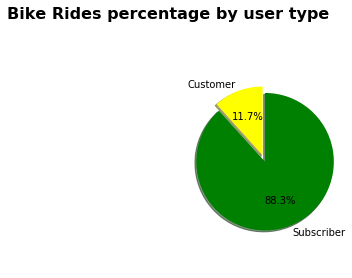

In [48]:
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_prop, subscriber_prop]
colors = ['yellow', 'green']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('Bike Rides percentage by user type', y=1.03, fontsize=16, fontweight='semibold');

88% of Subscribers are using bike service compare to customers using bike service with 11.7%. This tell us that Subscribers often use it for daily commute and customers use it for more lesiure activities 

### Monthly User Type Trends:

In [49]:
def transform_axis_fmt(tick_val, pos):
    if tick_val >= 1000:
        val = int(tick_val/1000)
        return '{:d}K'.format(val)
    elif tick_val >= 1000000: 
        val = int(tick_val/1000000)
        return '{:d}M'.format(val)
    else:
        return int(tick_val)

In [50]:
usertype_count_df = df_clean.groupby(["st_month", "user_type"]).size().reset_index()

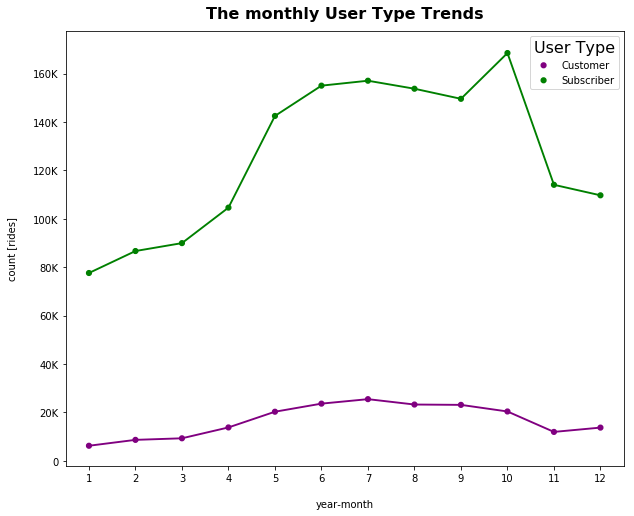

In [51]:
plt.figure(figsize=(10,8))
colors = {'Subscriber':'Green', 'Customer':'purple'}
ax = sns.pointplot(x='st_month', y=0, hue='user_type', palette=colors, scale=.7, data=usertype_count_df)
plt.title('The monthly User Type Trends', fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

From above line graph it looks like mostly subscribers are using service, also customers slightly increased in summer time from May to october. However, both subscribers and customers service decrease during winter season.

### weekly usage Trends by user type:

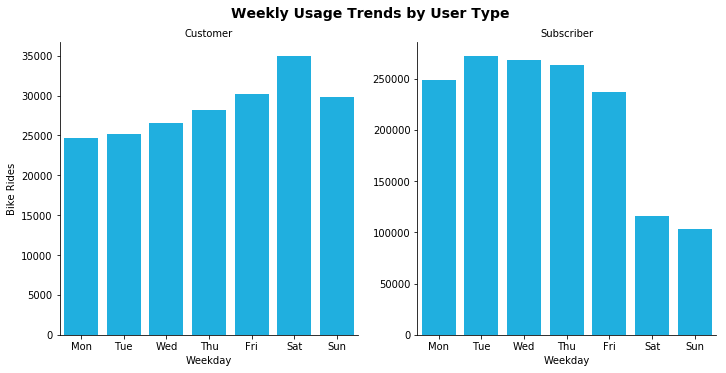

In [52]:
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sns.catplot(data=df_clean, x='st_weekday', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue', order = weekday)
g.set_axis_labels("Weekday", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Weekly Usage Trends by User Type', y=1.03, fontsize=14, fontweight='semibold');

From above bar graph trends shows difference between customers and subscribers.Customers often use the service during weekends where as Subscribers mostly use the service during regular weekdays from Monday to Friday, this tell us that subscribers are regularly use it for work and home commute purposes and customers use it for recreational activities during weekends.

###  Hourly usage trends by User type:

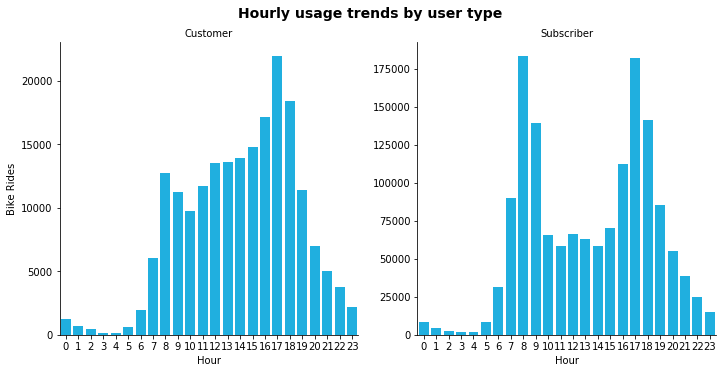

In [53]:
g = sns.catplot(data=df_clean, x='st_hour', col="user_type", kind='count', sharey = False,
            color = 'deepskyblue')
g.set_axis_labels("Hour", "Bike Rides")
g.set_titles("{col_name}")
g.fig.suptitle('Hourly usage trends by user type', y=1.03, fontsize=14, fontweight='semibold');

Customers mostly use the service early morning around 8 am and slowly increase rides after 10 am to 7pm where as subscribers mostly use the service between 8-9 am and 5-6 pm. This makes sense since subscribers use it for regular work hours and customers has more leisure time to take ride after regular work hours.

In [54]:
# Compute minutes for trip duration from duration_sec column
df_clean['duration_min'] = df_clean['duration_sec']/60

Text(0.5, 0, 'minutes [trip duration]')

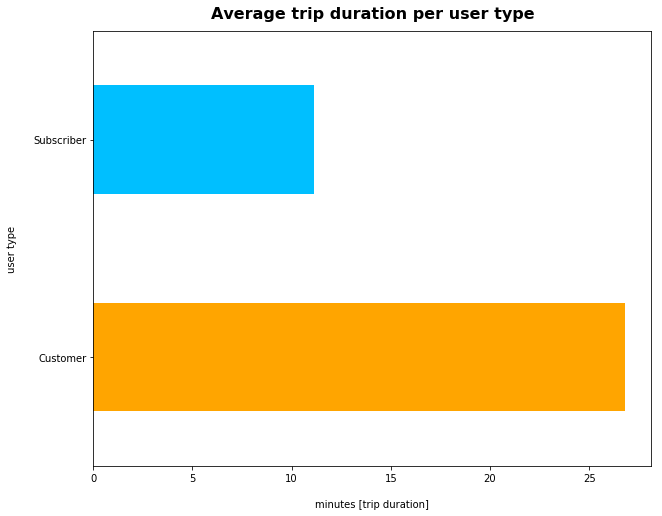

In [55]:
new_color=['orange', 'deepskyblue']
ax = df_clean.groupby('user_type')['duration_min'].mean().plot(kind='barh', color=new_color, figsize=(10,8))
ax.set_title('Average trip duration per user type', fontsize=16, y=1.015,fontweight='semibold')
ax.set_ylabel('user type', labelpad=16)
ax.set_xlabel('minutes [trip duration]', labelpad=16)

Fom above bar graph, it shows that Customers had longer trip duration around 28 minutes when compare to Subscribers who took average trip duration around 12 mins. Subscribers are mainly use the service for Work and Home Commute purpose, where as customers use service for fun around Bay area.

### Average Bike Trip distance of subscribers vs customers:

In [56]:
#Calculate distance in miles
def distance(origin, destination):
    """
    Parameters
    origin : tuple of float
        (lat, long)
    destination : tuple of float
        (lat, long)

    Returns
    distance_in_km : float
    """
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [57]:
# Convert Kms to Miles
df_clean['distance_kms'] = df_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)
df_clean['distance_miles'] = df_clean['distance_kms']*0.621371

Text(0.5, 0, 'distance in miles')

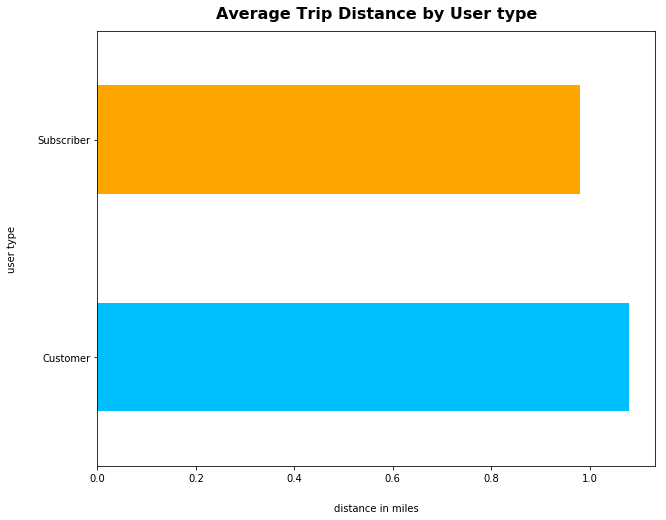

In [58]:
new_color= ['deepskyblue','orange']
ax = df_clean.groupby('user_type')['distance_miles'].mean().plot(kind='barh', color=new_color, figsize=(10,8))
ax.set_title('Average Trip Distance by User type', fontsize=16, y=1.015,fontweight='semibold')
ax.set_ylabel('user type', labelpad=20)
ax.set_xlabel('distance in miles', labelpad=20)

It looks like Customers and Subscribers had very little difference with 1 mile difference.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There is an interesting differences between Customers and Subscribers behavior patterns. As mentioned in above Bi-variate Exploration Analysis, Customers are more causual riders who often use the service between 10 am -7pm and slowly increase from mid of the week and take more rides during weekends. Subscribers who actually uses the service from Monday -Friday between 8 am-9am and 5pm-6pm.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
There is a difference in the trip duration between customers and subscribers. Unlike Subscribers, Customers took longer trip duration around 28 minutes to have more fun during weekends where as subscribers took shorter distance trips around 10-11 mins just use it for Work and Home commute purposes. In addition to that, Customers Trip Distance duration is slightly high when compare to Subscribers trip distance with 1.0 Mile difference.Finally, Yearly it shows that Subscribers took more rides or trips compare to Customers. However both customers and subscribers trips increased during summer time from May to October months and decrease during winter seasons.


### Multi-Variate Exploration:

### Bike Rides by Gender: 

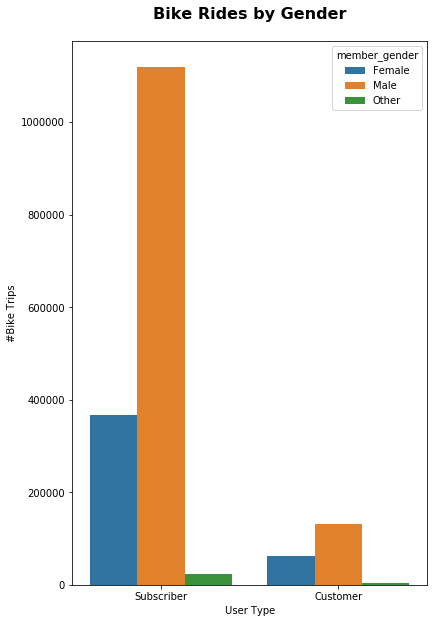

In [59]:
plt.figure(figsize = [14, 10])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')
g.set_title('Bike Rides by Gender', y=1.03, fontsize=16, fontweight='semibold');

Above Bar graph shows that Most of the Males and Females utilizing more service or trips compare to Customer user type. However it looks like from both user types males are using service than females.

### Monthly  Bike Trends by user type and gender:

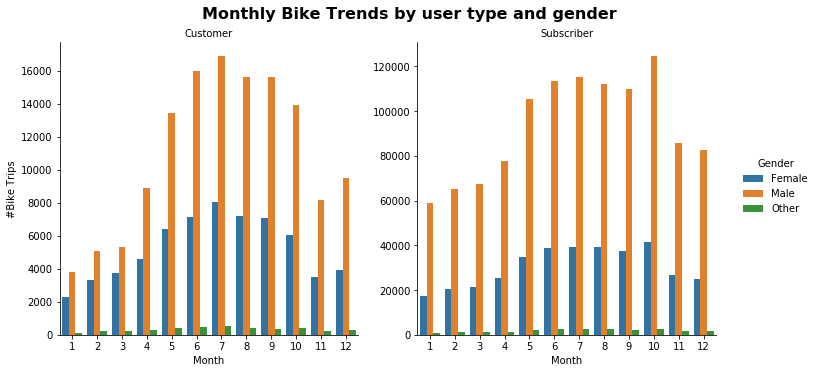

In [60]:

g = sns.catplot(data=df_clean, x='st_month', col="user_type", hue="member_gender", kind='count', sharey = False)
g.set_axis_labels("Month", "#Bike Trips")
g._legend.set_title('Gender')
g.set_titles("{col_name}")
g.fig.suptitle('Monthly Bike Trends by user type and gender', y=1.03, fontsize=16, fontweight='semibold');

Trends for both customers and subscribers trips increase during summer time from May to October and decrease during Winter season.

### Subscribers Monthly Bike trips by Member Age Group:

In [61]:
subscriber_df = df_clean[df_clean['user_type']=='Subscriber'].groupby(['st_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


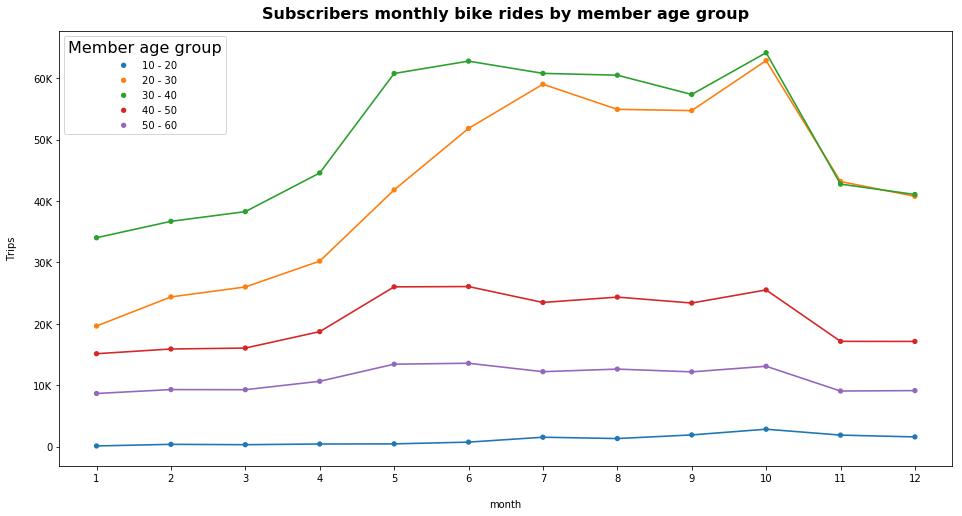

In [62]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x='st_month', y='bike_id', hue='member_age_bins', scale=.6, data=subscriber_df)
plt.title("Subscribers monthly bike rides by member age group", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

### Customers Monthly Bike Rides by Member Age Groups:

In [63]:
customer_df = df_clean[df_clean['user_type']=='Customer'].groupby(['st_month', 'member_age_bins']).agg({'bike_id':'count'}).reset_index()


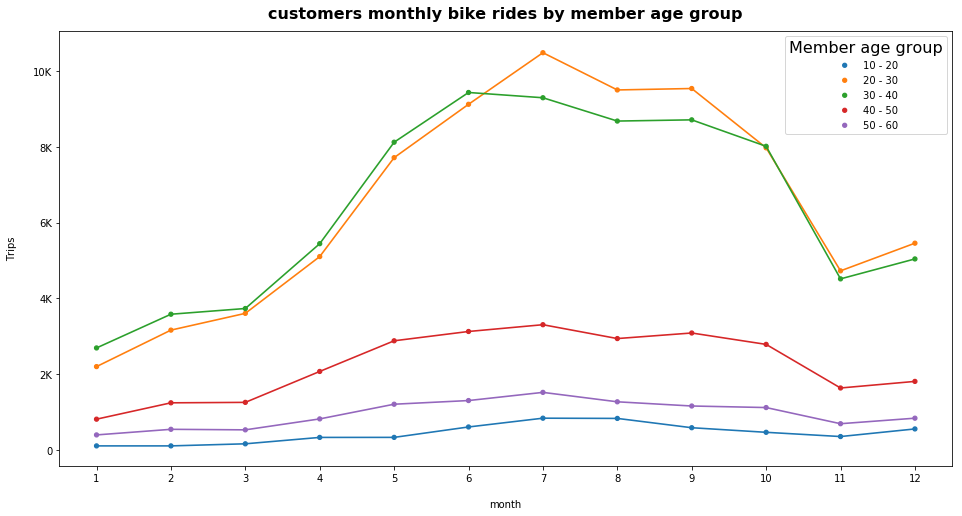

In [64]:
plt.figure(figsize=(16,8))
ax = sns.pointplot(x='st_month', y='bike_id', hue='member_age_bins', scale=.6, data=customer_df)
plt.title("customers monthly bike rides by member age group", fontsize=16, y=1.015,fontweight='semibold')
plt.xlabel('month', labelpad=16)
plt.ylabel('Trips', labelpad=16)
leg = ax.legend()
leg.set_title('Member age group',prop={'size':16})
ax = plt.gca()
ax.yaxis.set_major_formatter(tick.FuncFormatter(transform_axis_fmt))

From both user types:Subscribers and Customers most common behavior is that mostly 20-40 age groups are using service compare to other age groups like old people between 40-60. 

### Subscribers Bike Trends by Age Gender,Weekdays, Hours Analysis:

In [65]:
# Extract Subscribers age groups between 20 and 60
subscriber_df01 = df_clean[(df_clean['member_age']>=20) & (df_clean['member_age']<60) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Subscriber')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [66]:
#Extract Subscribers age groups between 20 and 30
subscriber_df2 = df_clean[(df_clean['member_age']>=20) & (df_clean['member_age']<30) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Subscriber')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [67]:
subscriber_df2['count'].head()

0    1168
1    3879
2    8215
3    6743
4    3060
Name: count, dtype: int64

In [68]:
# Extract Subscribers age groups between 30 and 40
subscriber_df3 = df_clean[(df_clean['member_age']>=30) & (df_clean['member_age']<40) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Subscriber')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()


In [69]:
# Extract Subscribers age groups between 40 and 50
subscriber_df4 = df_clean[(df_clean['member_age']>=40) & (df_clean['member_age']<50) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Subscriber')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [70]:
# Extract Weekdays for age groups between 20 and 30
subscriber_df2['st_weekday'] = pd.Categorical(subscriber_df2['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [71]:
# Extract Weekdays for age groups between 30 and 40
subscriber_df3['st_weekday'] = pd.Categorical(subscriber_df3['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [72]:
# Extract Weekdays for age groups between 40 and 50
subscriber_df4['st_weekday'] = pd.Categorical(subscriber_df4['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [73]:
# Calculate Percentage for 20 to 30 age groups
subscriber_df2['count_percentage'] = subscriber_df2['count'].apply(lambda x: (x/subscriber_df01['count'].sum())*100)

In [74]:
# Calculate Percentage for 30 to 40 age groups
subscriber_df3['count_percentage'] = subscriber_df3['count'].apply(lambda x: (x/subscriber_df01['count'].sum())*100)

In [75]:
# Calculate Percentage for 40 to 50 age groups
subscriber_df4['count_percentage'] = subscriber_df4['count'].apply(lambda x: (x/subscriber_df01['count'].sum())*100)

In [76]:
# Calculate Rank in ascending order for 20 to 30 age groups
subscriber_df2['rank'] = subscriber_df2['count_percentage'].rank(ascending=False).astype(int)

In [77]:
# Calculate Rank in ascending order for 30 to 40 age groups
subscriber_df3['rank'] = subscriber_df3['count_percentage'].rank(ascending=False).astype(int)

In [78]:
# Calculate Rank in ascending order for 40 to 50 age groups
subscriber_df4['rank'] = subscriber_df4['count_percentage'].rank(ascending=False).astype(int)

In [79]:
# Create Pivot table for 20 to 30 age groups
subscriber_pivot02 = subscriber_df2.pivot_table(index='st_hour', columns='st_weekday', values='rank')

In [80]:
# Create Pivot table for 30 to 40 age groups
subscriber_pivot03 = subscriber_df3.pivot_table(index='st_hour', columns='st_weekday', values='rank')

In [81]:
# Create Pivot table for 40 to 50 age groups
subscriber_pivot04 = subscriber_df4.pivot_table(index='st_hour', columns='st_weekday', values='rank')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

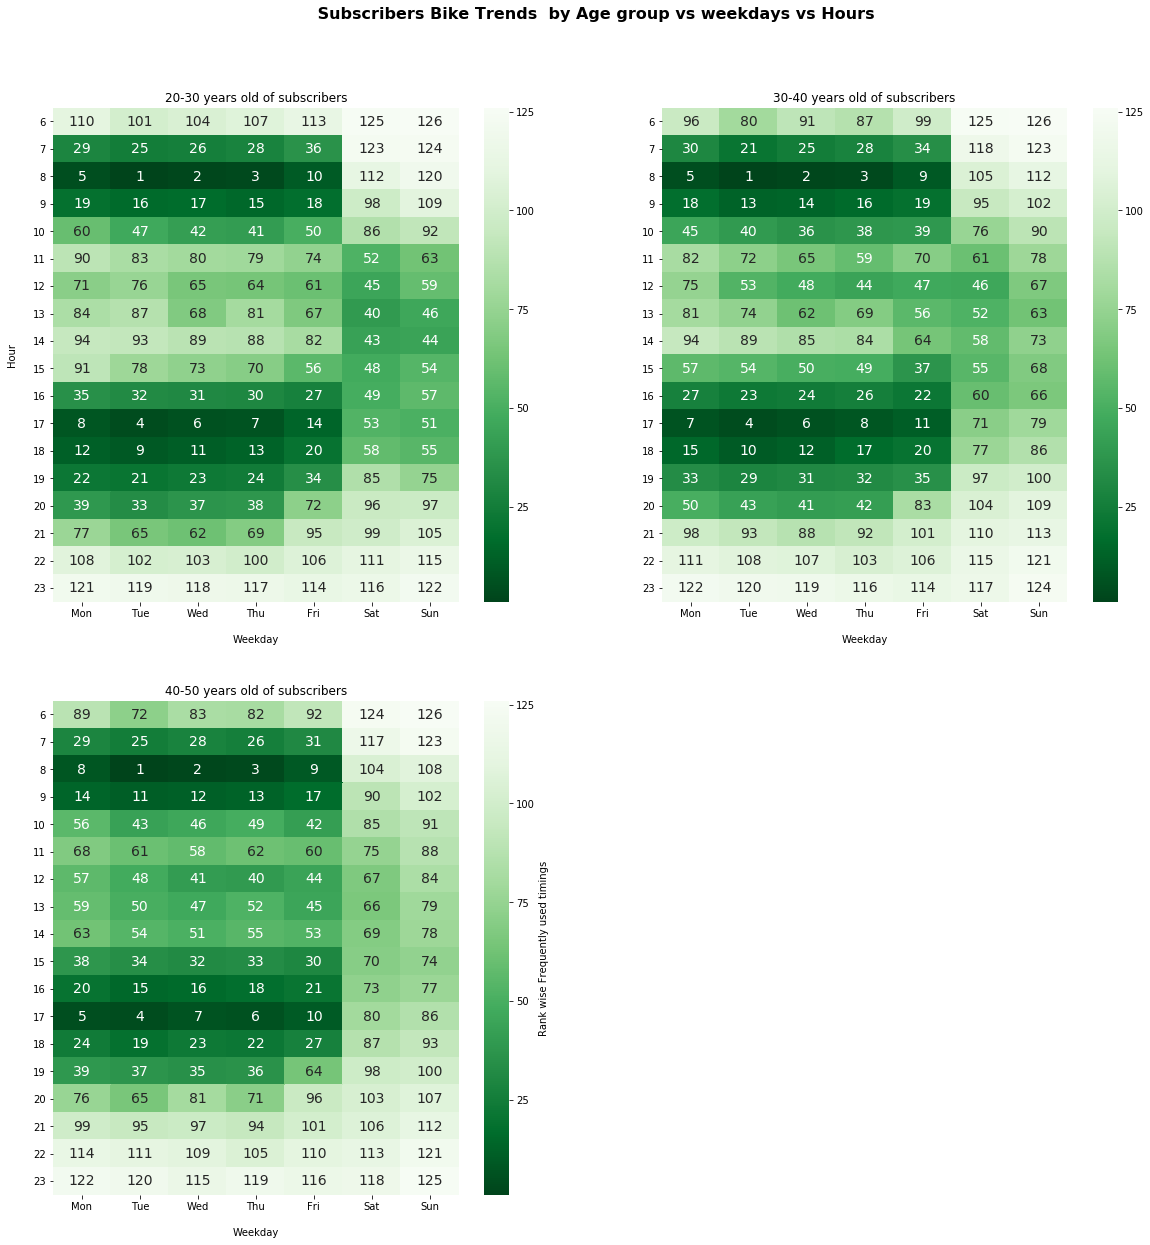

In [83]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle(' Subscribers Bike Trends  by Age group vs weekdays vs Hours', fontsize=16,fontweight='semibold', y=0.95)
sns.heatmap(subscriber_pivot02, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14})
plt.title("20-30 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(subscriber_pivot03, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14})
plt.title("30-40 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(subscriber_pivot04, fmt='d', annot=True, cmap='Greens_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of subscribers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

Both 20-30 yrs and 30-40 yrs age groups use the service from Monday to Friday weekday  between 7am-10am and 4-6pm for work and home commute purpose and some of them use after hours between 9pm -11 pm may be due to less traffic during night time. On other hand,40-50 yrs age group people use the service (bike ride) from Monday to Friday between 7am-10am and 4-7pm which is less compare to 20-40 age people.Furthermore,all age groups maximum use the service to spend more time with family and friends and fun ride during weekend saturday and sunday.

### Customers Bike Trends by Age Gender,Weekdays, Hours Analysis:

In [84]:
# Extract Customer age groups between 20 to 60
customer_df01 = df_clean[(df_clean['member_age']>=20) & (df_clean['member_age']<60) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Customer')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [85]:
# Extract Customer age groups between 20 to 30
customer_df2 = df_clean[(df_clean['member_age']>=20) & (df_clean['member_age']<30) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Customer')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [86]:
# Extract Customer age groups between 30 to 40
customer_df3 = df_clean[(df_clean['member_age']>=30) & (df_clean['member_age']<40) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Customer')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()


In [87]:
# Extract Customer age groups between 40 to 50
customer_df4 = df_clean[(df_clean['member_age']>=40) & (df_clean['member_age']<50) 
                              &(df_clean['st_hour']>5)&(df_clean['user_type']=='Customer')
                             ].groupby(['st_weekday', 'st_hour']).agg({'bike_id' : 'count'}).rename(columns={'bike_id':'count'}).reset_index()

In [88]:
# Extract Weekdays for 20-30 age groups
customer_df2['st_weekday'] = pd.Categorical(customer_df2['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [89]:
# Extract Weekdays for 30-40 age groups
customer_df3['st_weekday'] = pd.Categorical(customer_df3['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [90]:
# Extract Weekdays for 40-50 age groups
customer_df4['st_weekday'] = pd.Categorical(customer_df3['st_weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

In [91]:
# Calculate Percentage for 20-30 age groups
customer_df2['count_percentage'] = customer_df2['count'].apply(lambda x: (x/customer_df01['count'].sum())*100)

In [92]:
# Calculate Percentage for 30-40 age groups
customer_df3['count_percentage'] = customer_df3['count'].apply(lambda x: (x/customer_df01['count'].sum())*100)

In [93]:
# Calculate Percentage for 40-50 age groups
customer_df4['count_percentage'] = customer_df4['count'].apply(lambda x: (x/customer_df01['count'].sum())*100)

In [94]:
# Calculate Rank for 20-30 age groups
customer_df2['rank'] = customer_df2['count_percentage'].rank(ascending=False).astype(int)

In [95]:
# Calculate Rank for 30-40 age groups
customer_df3['rank'] = customer_df3['count_percentage'].rank(ascending=False).astype(int)

In [96]:
# Calculate Rank for 40-50 age groups
customer_df4['rank'] = customer_df4['count_percentage'].rank(ascending=False).astype(int)

In [97]:
# Create Pivot table for 20-30 age group 
customer_pivot02 = customer_df2.pivot_table(index='st_hour', columns='st_weekday', values='rank')

In [98]:
# Create Pivot table for 30-40 age group 
customer_pivot03 = customer_df3.pivot_table(index='st_hour', columns='st_weekday', values='rank')

In [99]:
# Create Pivot table for 40-50 age group 
customer_pivot04 = customer_df4.pivot_table(index='st_hour', columns='st_weekday', values='rank')

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5]),
 <a list of 18 Text yticklabel objects>)

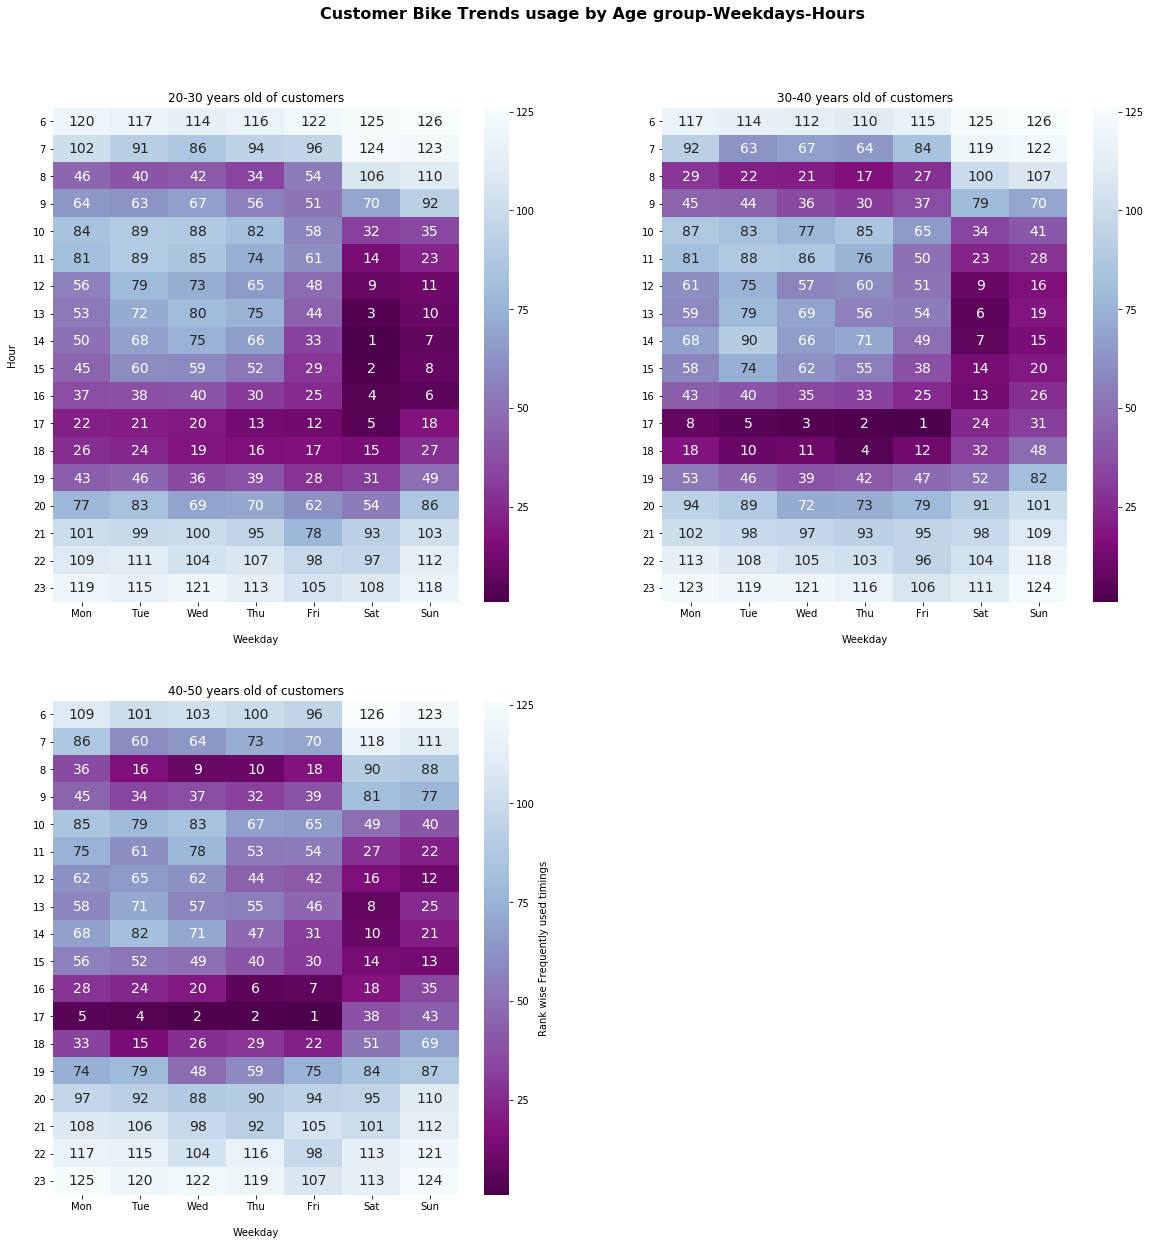

In [100]:
plt.figure(figsize=(20,20))
plt.subplot(221)
plt.suptitle('Customer Bike Trends usage by Age group-Weekdays-Hours', fontsize=16, y=0.95, fontweight='semibold')
sns.heatmap(customer_pivot02, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14})
plt.title("20-30 years old of customers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel('Hour', labelpad=16)
plt.yticks(rotation=360)
plt.subplot(222)
sns.heatmap(customer_pivot03, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14})
plt.title("30-40 years old of customers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)
plt.subplot(223)
sns.heatmap(customer_pivot04, fmt='d', annot=True, cmap='BuPu_r', annot_kws={"size": 14}, cbar_kws={'label': 'Rank wise Frequently used timings'})
plt.title("40-50 years old of customers", y=1.015)
plt.xlabel('Weekday', labelpad=16)
plt.ylabel(' ')
plt.yticks(rotation=360)

20-50 years of customers use service from Monday to Friday during 8-9am and 12-7pm and some of them use after hours 9pm-11pm due to less traffic. Most of the customers are active during weekends compare to Subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I Extended my Data Analysis between Subscribers and cusomters such as age group,hours, weekday. The multivariate exploration here showed me that both Customers and Subscribers people use most of the service between 7-9am and 4-6pm and some of them use after hours between 9pm -11 pm.
20-40 years people are more active in using the service for commute like they drive a bike when they go to their offices or come back to their homes. 
40-60 years people who are older than the others have more time to drive in a day like in the lunch time or in the morning or in the afternoon. It may be related with their retirement or older people have much more flexiable working hours rather than youngers. Subscribers and Customers Monthly trends shows that they mostly use between April to October and slow down during winter season.In addition to that Males use more road trips compare to Females and others. Furthermore,of all age groups  between 20-40 Age groups took most of the service compare to older people.

### Were there any interesting or surprising interactions between features?

Customers between 20-50 age groups use the service from Monday to Thursday start after morning traffic hours from 10am-11am and continue upto 3pm-4pm.Most of the Customers use after hours between 9pm-11pm due to less traffic on night time.On other side, Customers take less bike rides compare to subscribers who use most service during weekends.

### Conclusion:
For Data Analysis, I considered 2018 data from January to December. In 2018 people took around 18,63719 bike rides. In which 20-60 yrs took around 1,70,8250 bikes rides. 20-30 years Age group users are rapidly growing compared to other user groups. First service is started with 30-40 years users and followed by 20-30 yrs age group who became dominant over the year. 

Bike Rentals are high in demand between April to October months due to summer season and they drop during winter season.  Subscriers use the service during Weekdays from Monday to Friday for commute purposes between 8-9 am and 5-6pm are busy hours for daily bike riders.70 % of 20-40yrs used bike rides,of which 40% of 30-40 age group people took more rides compare to all other age groups. Male took around 76% of all bike rides,where as female took around %24 of them.

88% of Subscribers are using bike service compare to customers using bike service with 11.7%.People use this service on weekdays more than weekends. 8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well.Customers' rides seems increasing slightly but subscibers' rides reached 6 times more than customers' on October 2018. There is a decrease on November 2018 for subscribers but it seems like it is related with winter season. Subscribers' average trip duration is around 11 minutes. Customers' average trip duration is around 28 minutes. Subscribers and customers trip distance were about the same, which is slightly more than one mile.  From both user types: Subscriers and Customers Men took more rides compare to Female riders. In which 20-40 age group people who used most of the service compare to all other age groups between April-October and slow down during winter season. 20-40 years Subscribers took most of the rides during weekdays between 10 am to 3 -4pm and after hours between 9-11pm.Between 40-50 years subscribers used service mostly during weekends compare to weekdays.Between 20-50 yrs Customers took bike rides between 10 am to 4 pm from Monday to Friday and most of them took after hours between 9pm to 11pm due to less traffic. However, these customers took less rides on weekends when compare to weekdays this is because older people who are close to retirement age have more leisure time compare to younger people who use it for daily commute or busy work schedules during weekdays. 

### References:

1) https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

2) https://seaborn.pydata.org/tutorial/categorical.html

3) https://seaborn.pydata.org/generated/seaborn.countplot.html

4) https://seaborn.pydata.org/tutorial/color_palettes.html

5) https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

6) https://gist.github.com/rochacbruno/2883505

7) https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude

8) https://python-graph-gallery.com/92-control-color-in-seaborn-heatmaps/
